In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [2]:
# Read in the data as inefficiently as possible :)
df = pd.read_csv("vibes.csv", comment='#')
X1 = df.iloc[:, 0]
X2 = df.iloc[:, 1]
X3 = df.iloc[:, 2]
X4 = df.iloc[:, 3]
X5 = df.iloc[:, 4]
X6 = df.iloc[:, 5]
X7 = df.iloc[:, 6]
X8 = df.iloc[:, 7]
X9 = df.iloc[:, 8]
X10 = df.iloc[:, 9]
X11 = df.iloc[:, 10]
X12 = df.iloc[:, 11]
X13 = df.iloc[:, 12]
X14 = df.iloc[:, 13]
X15 = df.iloc[:, 14]
X16 = df.iloc[:, 15]
X17 = df.iloc[:, 16]
X18 = df.iloc[:, 17]
X19 = df.iloc[:, 18]
X20 = df.iloc[:, 19]
X21 = df.iloc[:, 20]
X22 = df.iloc[:, 21]
X23 = df.iloc[:, 22]
X24 = df.iloc[:, 23]
X25 = df.iloc[:, 24]
X26 = df.iloc[:, 25]
X27 = df.iloc[:, 26]
y = df.iloc[:, 27]
X = np.column_stack((X1, X2, X3, X4, X5, X6, X7, X8, X9, X9, X10,
                     X11, X12, X13, X14, X15, X16, X17, X18, X19, X20,
                     X21, X22, X23, X24, X25, X26, X27))


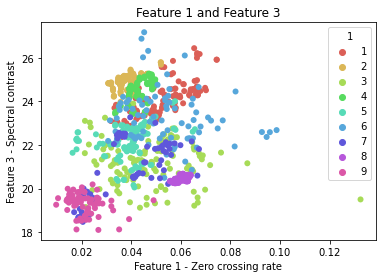

In [5]:
#Example showing 2 features
sns.scatterplot(x = X[:, 0], y = X[:, 2], hue = y, palette = sns.color_palette("hls", 9), edgecolor = "none")
plt.title('Feature 1 and Feature 3')
plt.xlabel('Feature 1 - Zero crossing rate')
plt.ylabel('Feature 3 - Spectral contrast')
plt.show()

### Cross Validation

### criterion='gini'

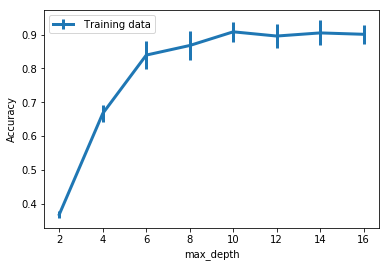

In [4]:
max_depth = [2, 4, 6, 8, 10, 12, 14, 16]

mean_error=[]
std_error=[]

for k in max_depth:
    tree = DecisionTreeClassifier(max_depth=k) #default criterion='gini', splitter='best'
    scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    
plt.errorbar(max_depth,mean_error,yerr=std_error,linewidth=3, label=' Training data')
plt.xlabel('max_depth'); plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
def tune_min_samples_leaf(min_samples_leaf_range, depth, criterion='gini'):
    mean_error=[]
    std_error=[]

    for k in min_samples_leaf_range:
        tree = DecisionTreeClassifier(min_samples_leaf=k, max_depth=depth, criterion=criterion)
        scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())

    plt.errorbar(min_samples_leaf_range,mean_error,yerr=std_error,linewidth=3, label=' Training data')
    plt.xlabel('min_samples_leaf'); plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

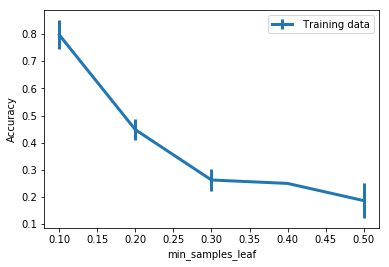

In [9]:
tune_min_samples_leaf(np.linspace(0.1, 0.5, 5), 8)

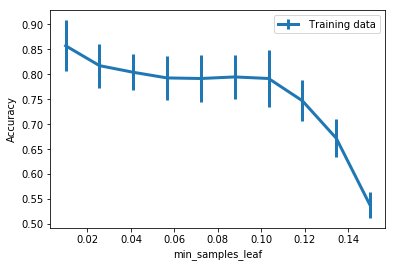

In [10]:
tune_min_samples_leaf(np.linspace(0.01, 0.15, 10), 8)

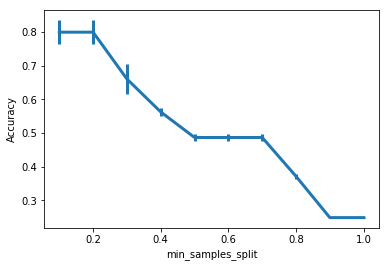

In [17]:
def tune_min_samples_split(min_samples_split, depth, min_sample_leaf, criterion='gini'):
    mean_error=[]
    std_error=[]
    for k in min_samples_split:
        tree = DecisionTreeClassifier(min_samples_split=k, max_depth=depth, min_samples_leaf=min_sample_leaf, criterion=criterion)
        scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())

    plt.errorbar(min_samples_split,mean_error,yerr=std_error,linewidth=3)
    plt.xlabel('min_samples_split'); plt.ylabel('Accuracy')
    plt.show()
    
tune_min_samples_split(np.linspace(0.1, 1, 10), 8, 0.1)

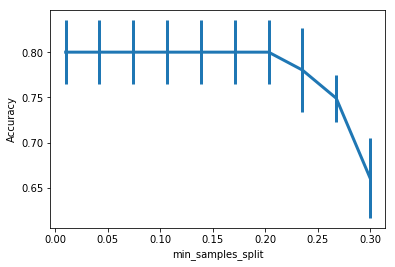

In [18]:
tune_min_samples_split(np.linspace(0.01, 0.3, 10), 8, 0.1)

### criterion='entropy'

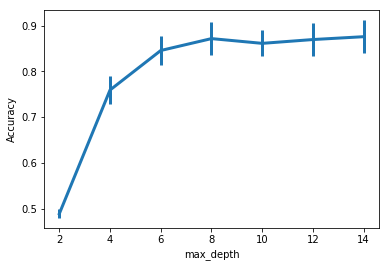

In [19]:
max_depth = [2, 4, 6, 8, 10, 12, 14]
mean_error=[]
std_error=[]

for k in max_depth:
    tree = DecisionTreeClassifier(max_depth=k, criterion='entropy') #default criterion='gini', splitter='best'
    scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    
plt.errorbar(max_depth,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('max_depth'); plt.ylabel('Accuracy')
plt.show()

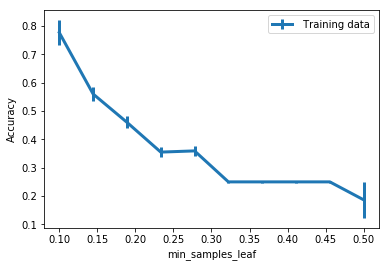

In [20]:
tune_min_samples_leaf(np.linspace(0.1, 0.5, 10), 8, 'entropy')

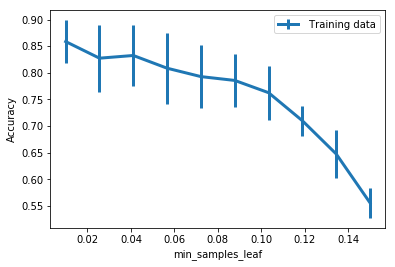

In [22]:
tune_min_samples_leaf(np.linspace(0.01, 0.15, 10), 8, 'entropy')

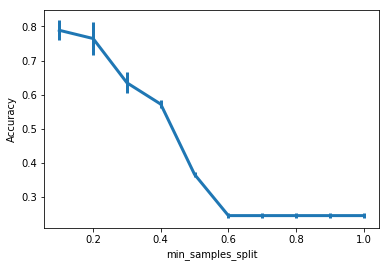

In [23]:
tune_min_samples_split(np.linspace(0.1, 1, 10), 8, 0.04, 'entropy')

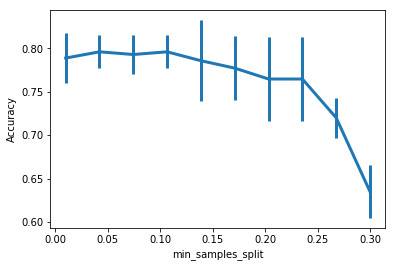

In [24]:
tune_min_samples_split( np.linspace(0.01, 0.3, 10), 8, 0.04, 'entropy')

### Tuned Model Performance

In [30]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.1, min_samples_split=0.2).fit(X_train, y_train)
ypred = model.predict(X_test)
print("Testing data accuracy",accuracy_score(y_test, ypred))
ypred_train = model.predict(X_train)
print("Training data accuracy",accuracy_score(y_train, ypred_train))

print(classification_report(y_test, ypred))
confusion_matrix(y_test, ypred)

Testing data accuracy 0.8050314465408805
Training data accuracy 0.8258164852255054
             precision    recall  f1-score   support

          1       0.82      0.93      0.87        40
          2       0.84      1.00      0.91        42
          3       0.78      0.70      0.74        40
          4       0.76      0.97      0.85        35
          5       0.83      0.69      0.75        42
          6       0.00      0.00      0.00        23
          7       0.46      0.57      0.51        23
          8       0.98      1.00      0.99        48
          9       0.83      1.00      0.91        25

avg / total       0.75      0.81      0.77       318



C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[37,  1,  1,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3, 28,  0,  0,  0,  7,  1,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1],
       [ 2,  2,  4,  3, 29,  0,  2,  0,  0],
       [ 5,  2,  0,  6,  3,  0,  6,  0,  1],
       [ 0,  0,  3,  1,  3,  0, 13,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

In [ ]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model, fontsize=2, filled=True)
plt.title("Decision trees (Gini)")

In [31]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=0.04, min_samples_split=0.2).fit(X_train, y_train)
ypred = model.predict(X_test)
print("Testing data accuracy",accuracy_score(y_test, ypred))
ypred_train = model.predict(X_train)
print("Training data accuracy",accuracy_score(y_train, ypred_train))

print(classification_report(y_test, ypred))
confusion_matrix(y_test, ypred)

Testing data accuracy 0.8081761006289309
Training data accuracy 0.8258164852255054
             precision    recall  f1-score   support

          1       0.84      0.93      0.88        40
          2       0.91      1.00      0.95        42
          3       0.83      0.62      0.71        40
          4       0.71      0.97      0.82        35
          5       0.67      0.71      0.69        42
          6       0.00      0.00      0.00        23
          7       0.59      0.70      0.64        23
          8       0.98      1.00      0.99        48
          9       0.86      1.00      0.93        25

avg / total       0.76      0.81      0.78       318



C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[37,  1,  0,  1,  0,  0,  1,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 25,  0,  6,  0,  7,  1,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1],
       [ 2,  0,  5,  3, 30,  0,  2,  0,  0],
       [ 4,  3,  0,  8,  7,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  2,  0, 16,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

Text(0.5, 1.0, 'Decision trees (Entropy)')

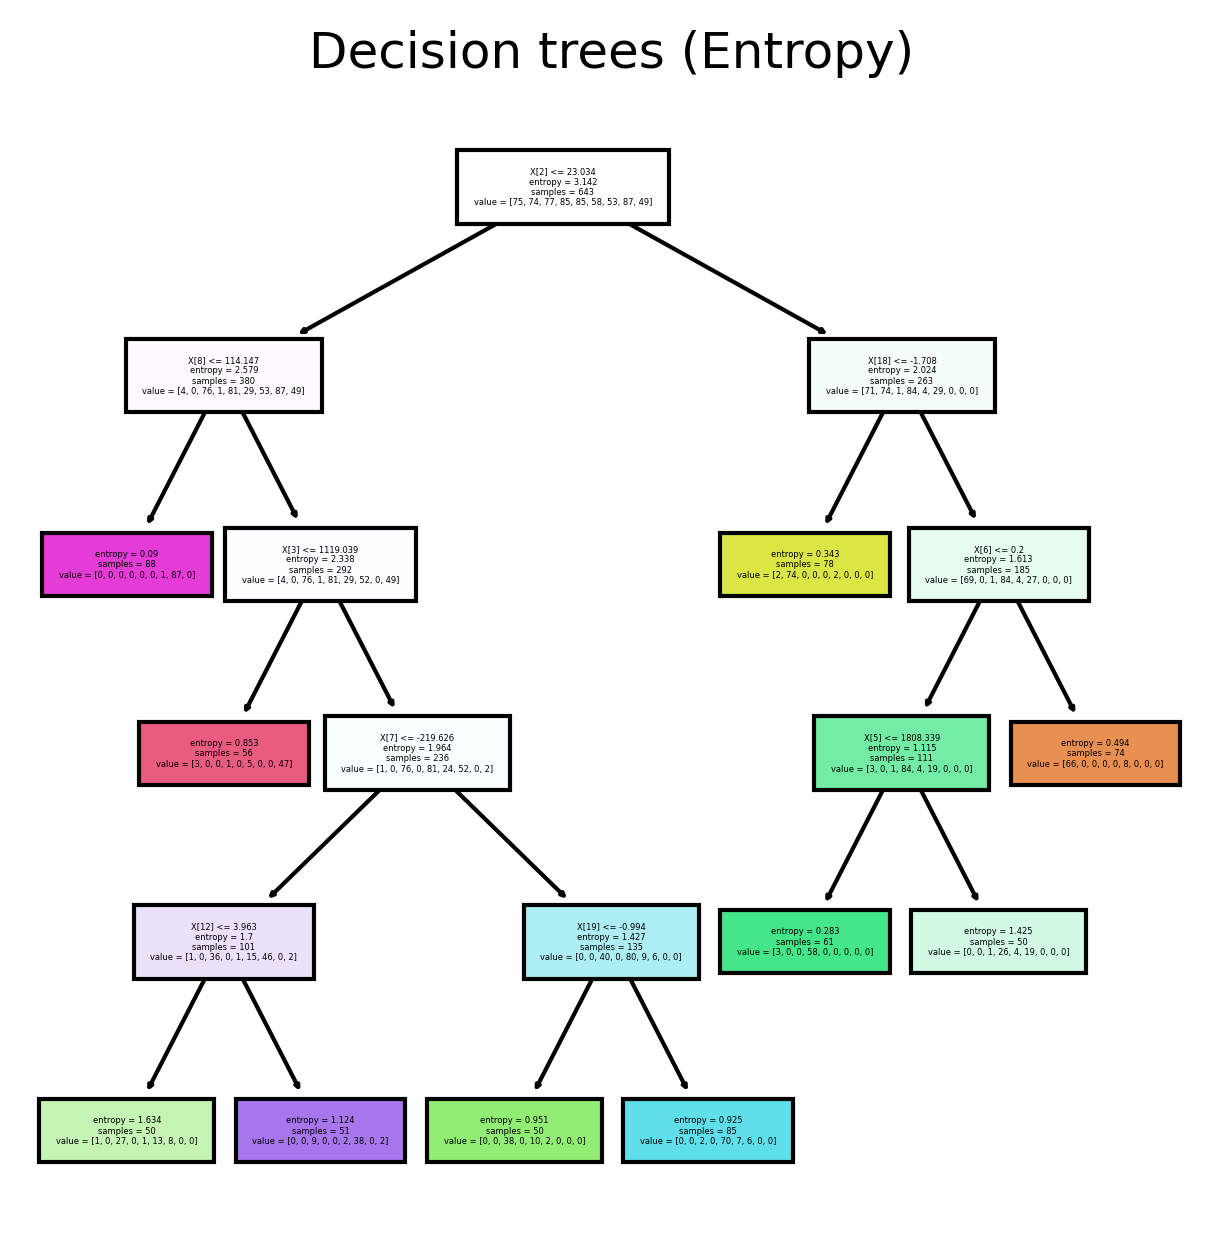

In [63]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model, fontsize=2, filled=True)
plt.title("Decision trees (Entropy)")

### Dummy Classifier

In [14]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent').fit(X, y)
ydummy = dummy.predict(X)
print(accuracy_score(y, ydummy))

0.12486992715920915
